
<table>
  <tr>
    <td> <center><img src="images/header1.png" width=400></center> </td>
  </tr>
</table>

<h1><center>Основы машинного обучения</center></h1>
<hr>
<h2><center>Методы обучения без учителя: Кластеризация (практика)</center></h2>
<h3><center>Ефимов Владислав</center></h3>

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-talk')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

# Применение K-means

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.

In [3]:
df_sns = pd.read_csv('data/snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

#### Задание

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)



# Рационы питания в странах

Загрузите набор данных о пищевом рационе в разных странах мира `diet.csv`

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [5]:
df = pd.read_csv('data/diet.csv', sep=';').iloc[:, :-1]

In [6]:
df.head()

,Countries,Energy (kcal/day),Protein (g/day),Fats (g/day),Carbohydrates (g/day),Animal Products + (kcal/day),Animal Fats (kcal/day),Bovine Meat (kcal/day),"Butter, Ghee (kcal/day)",Cheese (kcal/day),...,Soyabean Oil (kcal/day),Starchy Roots (kcal/day),Sugar & Sweeteners (kcal/day),Sugar (Raw Equivalent) (kcal/day),"Sugar, Raw Equivalent (kcal/day)","Sugar, Refined Equiv (kcal/day)",Vegetable Oils (kcal/day),Vegetables (kcal/day),Wheat (kcal/day),Wine (kcal/day)
0,Albania,2860.0,96,86,425.50,813.0,49,62,11,50,...,2,57,193,187,191,187,174,94,1166,6
1,Argentina,2980.0,94,100,426.00,823.0,72,342,28,90,...,43,100,406,337,405,337,311,51,914,59
2,Australia,3120.0,107,134,371.50,1033.0,124,142,62,107,...,17,87,423,407,415,407,435,67,559,39
3,Austria,3740.0,111,162,459.50,1219.0,320,59,102,193,...,89,113,437,404,424,404,442,61,617,55
4,Bangladesh,2200.0,48,25,445.75,65.0,5,5,3,0,...,48,42,59,29,59,29,131,10,180,0


In [7]:
scaler = StandardScaler()

In [8]:
X = df.iloc[:, 1:]
X = scaler.fit_transform(X)


1. Отнормируйте данные с помощью `RobustScaler` или `StandardScaler`
2. Используйте метод K-средних. Выберите число кластеров с помощью критерия силуэта
3. Найдите выбросы и проинтерпретируйте кластеры

In [9]:
## Your Code Here

## Оценка `epsilon` для DBSCAN

То что нам не нужно определять количество выходных кластеров в DBSCAN - это конечно хорошо, но как определить `min_pts` и `epsilon`?) Есть одна методика

Будем считать, что MinPts нам дан свыше (например MinPts = 2). Воспользуемся следующим способом оценки:

* Нормализуем признаки, например с помощью `RobustScaler` или `StandartScaler`
* Расчитаем расстояние до k=MinPts ближайшего соседа каждой точки (класс `NearestNeighbors` и метод `kneighbors`)
* Отсортируем полученный массив и выведите его на график
* По графику будет примерно понятно, сколько точек уйдет в шум, а сколько попадет в полноценный кластер

In [10]:
from sklearn.neighbors import NearestNeighbors

In [11]:
from sklearn.preprocessing import RobustScaler

In [12]:
k = 2

In [13]:
X_t = RobustScaler().fit_transform(X)

In [14]:
X.shape

(86, 49)

In [15]:
X_t.shape

(86, 49)

In [16]:
nn = NearestNeighbors(n_neighbors=2).fit(X_t)

In [17]:
dists, points = nn.kneighbors()

In [18]:
dists[:5]

array([[3.7533954 , 4.17052753],
       [5.55604681, 6.396767  ],
       [4.91336984, 5.79658974],
       [4.51624047, 4.63299337],
       [5.30171707, 5.49504645]])

In [20]:
points[:5]

array([[10, 29],
       [13, 65],
       [17, 83],
       [19, 75],
       [38, 77]])

In [21]:
k_neighbor = dists[:, k - 1]

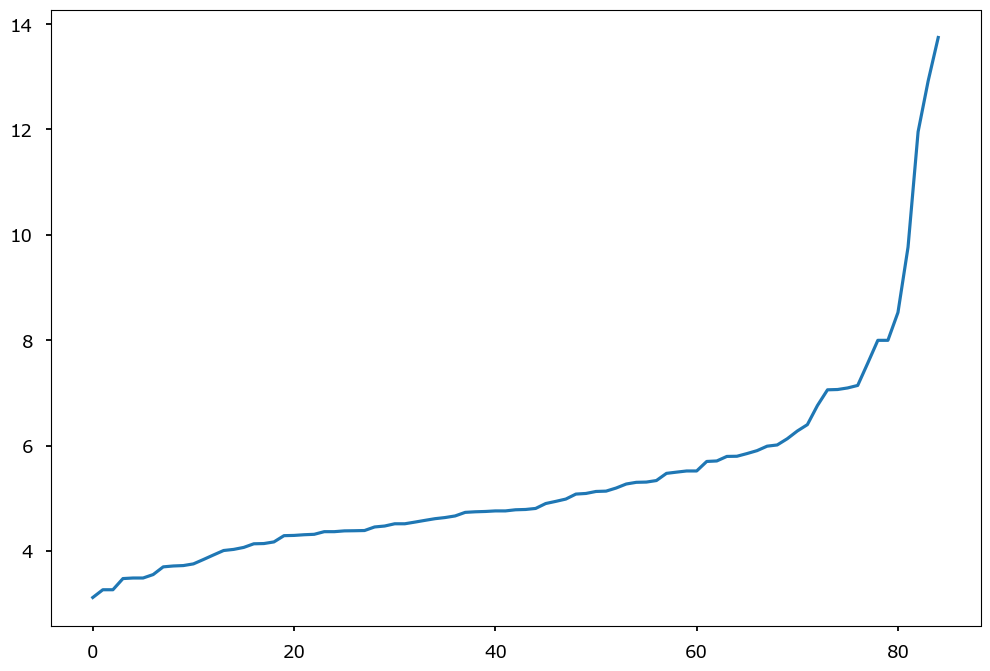

In [24]:
plt.plot(sorted(k_neighbor)[:-1])

# Задача про кластеризацию текстов

Рассмотрим коллекцию новостных сообщений за первую половину 2017 года. Про каждое новостное сообщение известны:
* его заголовок и текст
* дата его публикации
* событие, о котором это новостное сообщение написано 
* его рубрика 

In [25]:
df = pd.read_csv('./data/news.csv', encoding='utf8')
df.head()

,text,date,event,class
0,В ПЕТЕРБУРГЕ ПРОШЕЛ МИТИНГ ПРОТИВ ПЕРЕДАЧИ ИС...,2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
1,"Lenta.co, Москва, 14 января 2017 СИТУАЦИЯ С П...",2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
2,"Аргументы и Факты (aif.ru), Москва, 14 января...",2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
3,"Google Новости ТОП, Москва, 14 января 2017 АК...",2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
4,"Газета.Ru, Москва, 13 января 2017 В МОСКОВСКО...",2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ


In [26]:
df.loc[:, 'class'].value_counts()

Важные мировые события                           403
Внутренняя политика РФ                           364
Внутренняя политика РФ: оппозиция                277
Теракты                                          200
Международные отношения                          153
Спорт                                            102
Внутренняя политика: культура                    100
Проишествия  РФ                                  100
Спорт                                            100
Международные отношения: Криминальная хроника     82
Технологии                                        49
Name: class, dtype: int64

Попробуем кластеризовать документы (каким-либо методом) и сравним полученное разбиение с данными рубликами с помощью ARI

### Стандартная предобработка текстов

In [27]:
import re

# Оставляем только кириллические символы
regex = re.compile("[А-Яа-я]+")

def words_only(text, regex=regex):
    return " ".join(regex.findall(text))


df.text = df.text.str.lower()
df.loc[:, 'text'] = df.text.apply(words_only)

In [28]:
import nltk

In [29]:
from nltk.corpus import stopwords

# Удаляем стоп-слова
mystopwords = stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д', '-', '-']

def  remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""
    
df.text = df.text.apply(remove_stopwords)   

In [30]:
%%time 
from pymystem3 import Mystem


# нормализуем текст
m = Mystem()
def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "

df.text = df.text.apply(lemmatize)

CPU times: user 2.88 s, sys: 177 ms, total: 3.05 s
Wall time: 15.6 s


In [31]:
mystoplemmas = ['который', 'прошлый', 'сей', 'свой', 'наш', 'мочь']

# Еще кое-что удаляем
def  remove_stoplemmas(text, mystoplemmas = mystoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in mystoplemmas])
    except:
        return ""

df.text = df.text.apply(remove_stoplemmas)  

In [32]:
df.text[0]

'петербург проходить митинг против передача исаакиевский собор рпц санкт петербург человек устраивать акция протест против передача исаакиевский собор безвозмездный пользование рпц житель петербург собираться исаакиевский площадь высказываться против передача исаакиевский собор безвозмездный пользование рпц передавать тасс акция проходить формат встреча депутат законодательный собрание город требовать согласование власть участник акция использовать какой либо символика плакат мегафон средство звукоусиление слово депутат алексей ковалев исаакиевский площадь приходить примерно тысяча человек участник протест выступать депутат местный парламент борис вишневский максим резник заявлять потребовать отмена решение смольный вишневский сообщать акция проходить вид встреча депутат избиратель закон санкт петербург предоставлять мы право встречаться избиратель такой встреча проводить рассказывать защищать интерес передача собор сказать парламентарий очередь директор музей исаакиевский собор никола

## Вычисление сходства

С помощью `TfidfVectorizer` и `pairwise_distances` расчитываем косинусное расстояние между всеми парами документов в корпусе

In [33]:
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances

In [34]:
vect = TfidfVectorizer()
texts = df.text.values

In [35]:
S = pairwise_distances(vect.fit_transform(texts))

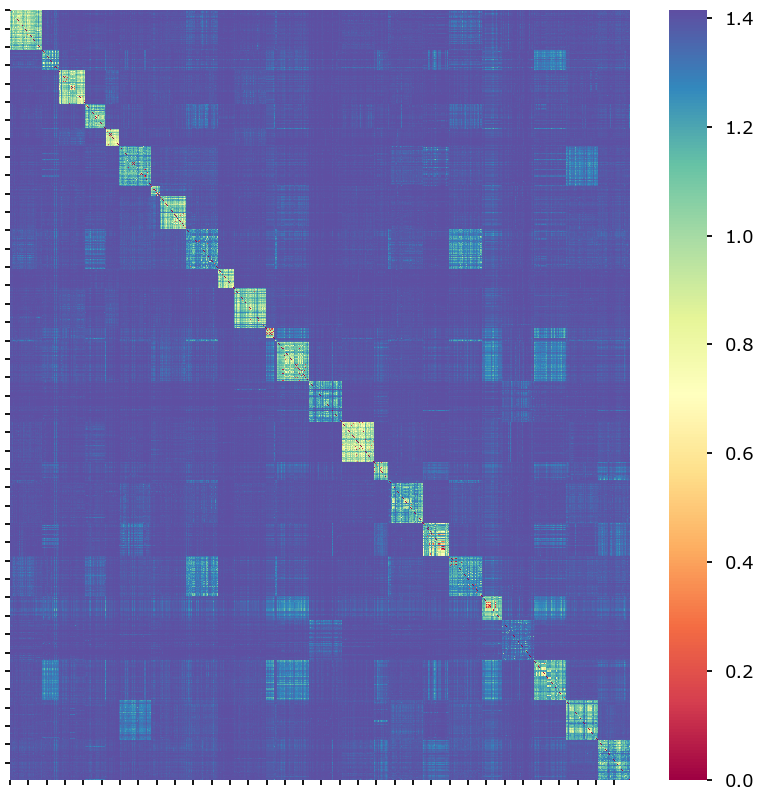

In [37]:
plt.figure(figsize = (10,10))
_ = sns.heatmap(data=S, cmap = 'Spectral').set(xticklabels=[],yticklabels=[])

Вы должны пронаблюдать, что между некоторыми текстами есть довольно выскокое сходство по содержанию слов. 

Попробуем их кластеризовать

## DBSCAN
* Воспользуйтесь методикой оценки параметров для алгоритма DBSCAN. Используйте косинусную меру близости. Имейте в виду, что min_pts=2 из игрушечного примера ранее это не самый лучший выбор, этот параметр вообще говоря надо подбирать.
* Выделите кластеры. Для каждого кластера (кроме -1, если он будет) выведите несколько текстов и умозрительно определите его тематику
* Оцените сходство с изначальными рубриками визуально (с помощью матрицы перемешивания) и с помощью ARI
* \* Попробуйте другие алгоритмы кластериазации.

In [ ]:
# Your Code Here

In [ ]:
labels = ...

In [ ]:
adjusted_rand_score(true_label, labels)

In [ ]:
pd.crosstab(df.loc[:, 'class'], labels)